In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from pandas.api.types import is_numeric_dtype, is_object_dtype
from ast import literal_eval
from pprint import pp
from collections import Counter

df = pd.read_csv('./files/Boston_airbnb_2021/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210919145601,2021-09-19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,4.95,4.86,4.90,NaN,f,1,1,0,0,0.29
1,5506,https://www.airbnb.com/rooms/5506,20210919145601,2021-09-19,** Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,...,4.89,4.53,4.77,Approved by the government,f,10,10,0,0,0.90
2,6695,https://www.airbnb.com/rooms/6695,20210919145601,2021-09-19,Home Away from Home! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,4.95,4.48,4.70,STR446650,f,10,10,0,0,1.33
3,8789,https://www.airbnb.com/rooms/8789,20210919145601,2021-09-19,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/32210/7fdd2fd...,26988,https://www.airbnb.com/users/show/26988,...,4.96,4.96,4.56,NaN,f,5,5,0,0,0.30
4,10730,https://www.airbnb.com/rooms/10730,20210919145601,2021-09-19,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Beacon Hill is located downtown and is conveni...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,...,4.92,4.96,4.43,NaN,f,5,5,0,0,0.40


In [21]:
# Check dataset shape. Rows / Columns
df.shape

(3123, 74)

In [22]:
# Check list of columns
list(df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [23]:
# Check null values for each columns that we might consider of dropping later. 
df.isnull().sum().sort_values(ascending=False).head(50)

neighbourhood_group_cleansed                    3123
bathrooms                                       3123
calendar_updated                                3123
license                                         1418
neighborhood_overview                           1033
neighbourhood                                   1033
host_about                                       997
review_scores_value                              861
review_scores_location                           861
review_scores_checkin                            861
review_scores_accuracy                           860
review_scores_communication                      859
review_scores_cleanliness                        859
reviews_per_month                                847
first_review                                     847
review_scores_rating                             847
last_review                                      847
host_response_time                               682
host_response_rate                            

### What are some popular neighbourhood and property type in listings?

<AxesSubplot:>

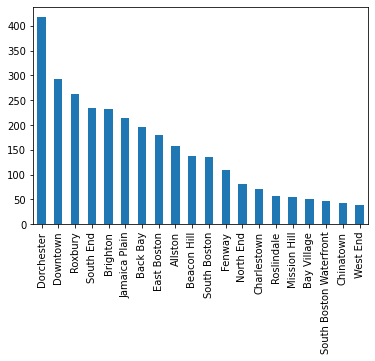

In [24]:
# Most popular neighbourhood

df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

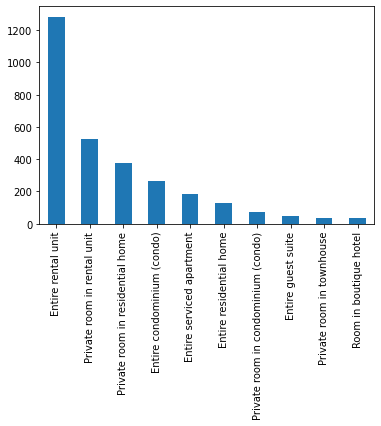

In [41]:
# Most popular property type for listing

df['property_type'].value_counts().head(10).plot(kind='bar')

### What are some of the most common amenities for listing?

In [26]:
# Flatten out amenities

# For each listing's amenities list, they were stored as list string. 
# So we turn from string back to code literal. 

amenities_ds = df['amenities']
amenities_ds

0       ["Heating", "Refrigerator", "Essentials", "Cof...
1       ["Heating", "Refrigerator", "Essentials", "Cof...
2       ["Heating", "Refrigerator", "Essentials", "Cof...
3       ["Heating", "Refrigerator", "Essentials", "Cof...
4       ["Heating", "Refrigerator", "Essentials", "Cof...
                              ...                        
3118    ["Refrigerator", "Essentials", "Coffee maker",...
3119    ["Heating", "Refrigerator", "Essentials", "TV"...
3120    ["Kitchen", "Paid parking on premises", "Heati...
3121    ["Refrigerator", "Essentials", "Coffee maker",...
3122    ["Refrigerator", "Essentials", "Coffee maker",...
Name: amenities, Length: 3123, dtype: object

<AxesSubplot:>

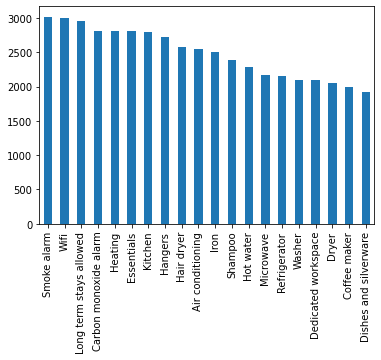

In [27]:
# Counting instances

amenities_dict = {}

for i in amenities_ds:
    l = literal_eval(i)
    for j in l:
        if j not in amenities_dict:
            amenities_dict[j] = 1
        else:
            amenities_dict[j] += 1


pd.Series(amenities_dict).sort_values(ascending=False).head(20).plot(kind='bar')

### Distribution Boston Airbnb Listing Price 2021 (Sep)

In [28]:
df['price']

0       $125.00
1       $124.00
2       $169.00
3       $110.00
4       $100.00
         ...   
3118    $364.00
3119     $37.00
3120     $35.00
3121    $170.00
3122    $200.00
Name: price, Length: 3123, dtype: object

In [29]:
# Since price is in a money text display format ('$xxx,xxx.xx)'. Transform them to pure numeric type first.

# Copy a fresh df for working

boston = df


boston['price'].replace({r'\$|,': ''}, regex=True, inplace=True)
boston['price'] = pd.to_numeric(boston['price'])

boston['price']

0       125.0
1       124.0
2       169.0
3       110.0
4       100.0
        ...  
3118    364.0
3119     37.0
3120     35.0
3121    170.0
3122    200.0
Name: price, Length: 3123, dtype: float64

In [30]:
# Working on Price attribute

price_ds = boston['price']

price_ds.describe()


count     3123.000000
mean       190.032981
std        278.113477
min          0.000000
25%         80.000000
50%        141.000000
75%        227.000000
max      10000.000000
Name: price, dtype: float64

In [31]:
price_median = np.median(price_ds)
price_median

141.0

In [32]:
# Counting Price ranges (per $20 range)

prices = price_ds.to_list()

# Per 20 dollar range. e.g 100-120 as a range, 120-140 as a range, so forth. 
histogram = Counter(price // 20 * 20 for price in prices)



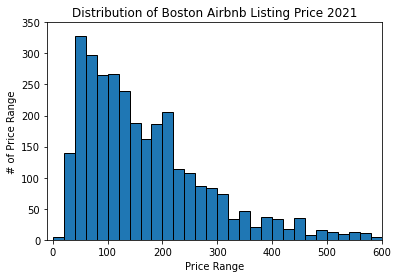

In [33]:
# Plot the price range distribution


# Shift right by 10
# x-axis is the price range (20 per unit)
# y-axis is the count of specific range

plt.bar(
    [x+10 for x in histogram.keys()],
    histogram.values(),
    20,
    edgecolor=(0,0,0)
)

# x-axis from -10 to 600 
# y-axis from 0 to 350
plt.axis([-10, 600, 0, 350]) 


plt.xlabel("Price Range")
plt.ylabel("# of Price Range")
plt.title("Distribution of Boston Airbnb Listing Price 2021")

plt.show()

# Right Skew shape. 
# $60-80 most offering ranges; 
# Overall, $80 - 160 range are popular. 
# $180-220 also quite common also; 
# Listing offerings drop significatanly after > $220 
# Median $141; Mean $190. (Median makes more sense, as mean() could 
# be affected by outlier listing like $10000.00 shown in describe())

### Machine Learning: Price Model

In [34]:
# Features Selections: Numeric


# Get all numeric features
numeric_variables = [col for col in boston.columns if is_numeric_dtype(boston[col])]
# pp(numeric_variables)

# Select numeric features for training
numeric_variables = ['price', 'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']
# pp(numeric_variables)



# Subset numeric dataset and clean it. (later to combineb)

boston_numeric = boston[numeric_variables]


# Fill missing/empty strategy:
# - bedrooms: median, (default to most common in this case)
# - beds: median, (default to most common in this case)
# - rating_score: 0, (perhaps new listing or simply no rating, initialized as zero)


boston_numeric = boston_numeric.fillna(
    {
        'bedrooms': boston_numeric['bedrooms'].median(),
        'beds': boston_numeric['beds'].median(),
        'review_scores_rating': 0
    }
)


# boston_numeric.isnull().sum()

boston_numeric

,price,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating
0,125.0,2,1.0,0.0,21,4.95
1,124.0,2,1.0,1.0,108,4.77
2,169.0,4,1.0,0.0,115,4.79
3,110.0,2,1.0,1.0,25,4.64
4,100.0,2,1.0,1.0,32,4.78
...,...,...,...,...,...,...
3118,364.0,5,2.0,1.0,0,0.00
3119,37.0,1,1.0,0.0,0,0.00
3120,35.0,1,1.0,0.0,0,0.00
3121,170.0,3,1.0,1.0,0,0.00


In [35]:
# Features Selections: Object/Categorical


# Get all object type (categorical) features
object_variables = [col for col in boston.columns if is_object_dtype(boston[col])]
# pp(object_variables)

# Select object (categorical) features for training
object_variables = ['host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text']
# pp(object_variables)

# boston[object_variables].head(20)




# Subset object (categorical) dataset and clean it. (later to combine)

boston_obj = boston[object_variables]

# boston_obj.isnull().sum()


# Fill missing/empty strategy:
# only bathrooms_text has one instance of null.
# just fill it with most common for ease.


boston_obj = boston_obj.fillna(
    {
        'bathrooms_text': boston_obj['bathrooms_text'].value_counts().index[0]
    }
)


# Since 'host_identity_verified' and 'host_is_superhost' are encoded as 't' and 'f' string,
# Make it to 1 and 0 as boolean representation, and then put to numeric subset created before, 
# and drop from categorial subset


# Helper function.
# Turn 't' or 'f' to 1 or 0
def text_to_boolean(text):
    return int(1) if text == 't' else int(0)


# Data transform for 'host_identity_verified' and 'host_is_superhost'
boston_numeric['host_verified'] = boston_obj['host_identity_verified'].apply(text_to_boolean)
boston_numeric['host_is_superhost'] = boston_obj['host_is_superhost'].apply(text_to_boolean)

# Since assign them to numeric subset, remove from obj/categorical subset
boston_obj.drop(['host_identity_verified'], axis=1, inplace=True)
boston_obj.drop(['host_is_superhost'], axis=1, inplace=True)

boston_obj

,neighbourhood_cleansed,property_type,room_type,bathrooms_text
0,East Boston,Entire rental unit,Entire home/apt,1 bath
1,Roxbury,Entire guest suite,Entire home/apt,1 bath
2,Roxbury,Entire condominium (condo),Entire home/apt,1 bath
3,Downtown,Entire rental unit,Entire home/apt,1 bath
4,Downtown,Entire rental unit,Entire home/apt,1 bath
...,...,...,...,...
3118,South End,Entire serviced apartment,Entire home/apt,2.5 baths
3119,Brighton,Private room in rental unit,Private room,1 shared bath
3120,Dorchester,Private room in rental unit,Private room,1 shared bath
3121,Dorchester,Entire serviced apartment,Entire home/apt,1 bath


In [36]:
# Implement One-Hot encoding to categorical variables
boston_categorical = pd.get_dummies(boston_obj)

boston_categorical.columns

boston_categorical

,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,...,bathrooms_text_4 baths,bathrooms_text_4 shared baths,bathrooms_text_4.5 baths,bathrooms_text_5 baths,bathrooms_text_5 shared baths,bathrooms_text_6 baths,bathrooms_text_6 shared baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3119,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3120,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3121,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Combine numeric and categorical

boston_cleaned = pd.concat([boston_numeric, boston_categorical], axis=1)

boston_cleaned


,price,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,host_verified,host_is_superhost,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,...,bathrooms_text_4 baths,bathrooms_text_4 shared baths,bathrooms_text_4.5 baths,bathrooms_text_5 baths,bathrooms_text_5 shared baths,bathrooms_text_6 baths,bathrooms_text_6 shared baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath
0,125.0,2,1.0,0.0,21,4.95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,124.0,2,1.0,1.0,108,4.77,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,169.0,4,1.0,0.0,115,4.79,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110.0,2,1.0,1.0,25,4.64,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100.0,2,1.0,1.0,32,4.78,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,364.0,5,2.0,1.0,0,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3119,37.0,1,1.0,0.0,0,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3120,35.0,1,1.0,0.0,0,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3121,170.0,3,1.0,1.0,0,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Training

In [63]:

# Drop Rows on pirce > 800
boston_cleaned = boston_cleaned[boston_cleaned['price'] <= 800]


# Split into explanatory and response variable
X = boston_cleaned.drop(['price'], axis=1)
y = boston_cleaned['price']

# test_size - a float between [0,1] about what proportion of data should be in the test dataset
# rand_state - an int that is provided as the random state for splitting the data into training and test 

test_size = 0.3
rand_state = 46

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

(train_score, test_score)

(0.6226614345863971, 0.6035913426021724)

In [78]:
# Coefficients of our price predict/estimate model. 

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['Variables'] = X_train.columns
    coefs_df['Coefficients'] = np.round(lm_model.coef_, 2)
    coefs_df['Absolute'] = np.round(np.abs(lm_model.coef_),2)

    return coefs_df


coef_df = coef_weights(lm_model.coef_, X_train)


# top factors
coef_df.sort_values(by='Coefficients', ascending=False).head(40)

,Variables,Coefficients,Absolute
89,bathrooms_text_5 baths,373.40,373.40
60,property_type_Room in hotel,168.03,168.03
84,bathrooms_text_3.5 baths,137.91,137.91
13,neighbourhood_cleansed_Chinatown,130.54,130.54
64,property_type_Shared room in rental unit,89.02,89.02
32,property_type_Boat,78.89,78.89
80,bathrooms_text_2.5 baths,62.31,62.31
37,property_type_Entire guesthouse,55.46,55.46
15,neighbourhood_cleansed_Downtown,54.74,54.74
8,neighbourhood_cleansed_Back Bay,52.26,52.26
